In [1]:
import requests
import pandas as pd
import numpy as np
import findspark
import pandas as pd
import numpy as np
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType
from pyspark import SparkContext
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("Male_Married_Rejection").getOrCreate()

In [3]:
query= "(SELECT Married, Gender, (SUM(CASE WHEN Application_Status = 'N' THEN 1 ELSE 0 END) / COUNT(DISTINCT Application_ID)) * 100 \
AS reject_percentage FROM cdw_sapp_loan_application GROUP BY Married, Gender) as Reject_mm"

sdf_mm = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/capstone_project",\
                                     dbtable=query).load()

sdf_mm.show()

+-------+------+-----------------+
|Married|Gender|reject_percentage|
+-------+------+-----------------+
|     No|Female|          39.3939|
|     No|  Male|          37.7193|
|    Yes|Female|          32.0000|
|    Yes|  Male|          28.4314|
+-------+------+-----------------+



In [7]:
#Convert spark dataframe to pandas dataframe
pdf_mm = sdf_mm.toPandas()
pdf_mm.set_index(['Married', 'Gender'], inplace = True)
pdf_mm['reject_percentage'].dtype
pdf_mm['reject_percentage'] = pdf_mm['reject_percentage'].astype(float)

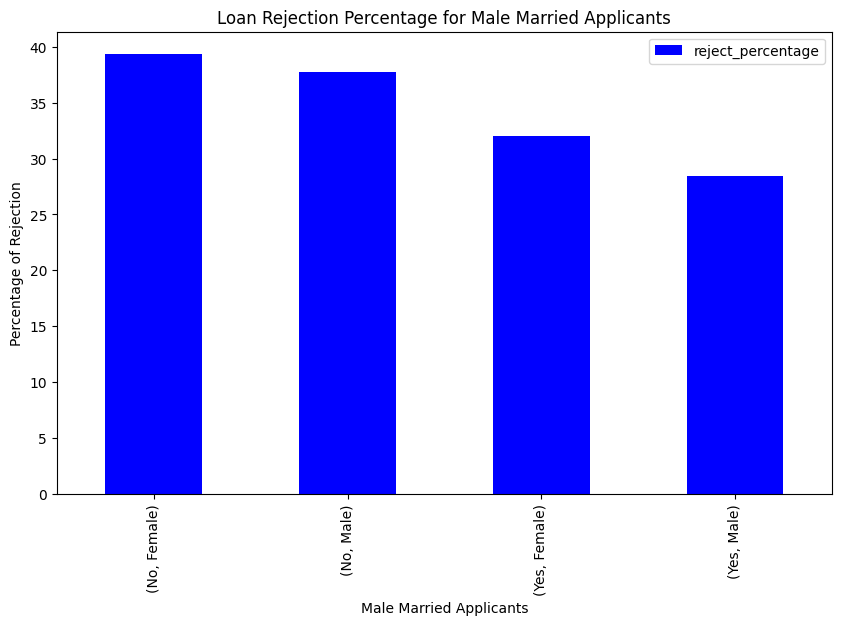

In [10]:
pdf_mm.plot(kind='bar', figsize=(10, 6), color = 'blue')
plt.xlabel('Male Married Applicants')
plt.ylabel('Percentage of Rejection')
plt.title('Loan Rejection Percentage for Male Married Applicants')
plt.show()